In [1]:
from ema_workbench.util import load_results, merge_results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

constant_policies = load_results(r'constant-policies.tar.gz')
policies_functions = load_results(r'policies-functions.tar.gz')

C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Data Prep ###
Add Outcome of final level of uncertainty, stick each policy in its own dataframe so they can be analysed and plotted seperately.

In [2]:
experiments1, outcomes1 = constant_policies

policies = experiments1['policy']

#flip sign of effectiveness score (had a negative sign to minimize it)
outcomes1['mean effectiveness'] = [ -x for x in outcomes1['mean effectiveness']]

#add the final level of uncertainty as an outcome

#first calculate the average level of uncertainty for each scenario over the replications
avg_unc_time = []

for i in range(0,outcomes1['Uncertainty over Time'].shape[0]):
    data = outcomes1['Uncertainty over Time'][i]

    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])
    
outcomes1['Avg Uncertainty over Time'] = np.array(avg_unc_time)

final_uncertainty = []
for i in range(0, outcomes1['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes1['Avg Uncertainty over Time'][i][-1])
    
outcomes1['final uncertainty'] = np.array(final_uncertainty)

#create a dataframe with all the scalar outcomes 
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']

data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies

#select a dataframe for each policy
exploration_100 = data[data['policy'] == 'All exploration']
mixed_random = data[data['policy'] == '50-50']
exploitation_100 = data[data['policy'] == 'All exploitation']


In [3]:
experiments2, outcomes2 = policies_functions

policies = experiments2['policy']

#flip sign of effectiveness score (had a negative sign to minimize it)
outcomes2['mean effectiveness'] = [ -x for x in outcomes2['mean effectiveness']]

#add the final level of uncertainty as an outcome

#first calculate the average level of uncertainty for each scenario over the replications
avg_unc_time = []

for i in range(0,outcomes2['Uncertainty over Time'].shape[0]):
    data = outcomes2['Uncertainty over Time'][i]

    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])
    
outcomes2['Avg Uncertainty over Time'] = np.array(avg_unc_time)

final_uncertainty = []
for i in range(0, outcomes2['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes2['Avg Uncertainty over Time'][i][-1])
    
outcomes2['final uncertainty'] = np.array(final_uncertainty)

#create a dataframe with all the scalar outcomes 
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']

data = pd.DataFrame.from_dict(dict((k, outcomes2[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies

#select a dataframe for each policy
exploration_141 = data[data['policy'] == 141]
exploration_185 = data[data['policy'] == 185]
mixed_148 = data[data['policy'] == 148]
exploitation_390 = data[data['policy'] == 390]
exploitation_661 = data[data['policy'] == 661]

### Visualization of the Outcome Distributions ###

In [5]:
### The Cost outcomes for policy 390, 661 and 148 all have outliers which makes it hard to study their "normal" behaviour ###

#Select and sort their values in order to understand what type of range we can set for the x-axis#

cost_390 = exploitation_390['mean cost per death prevented']
cost_390 = cost_390.sort_values()


cost_661 = exploitation_661['mean cost per death prevented']
cost_661 = cost_661.sort_values()

cost_148 = mixed_148['mean cost per death prevented']
cost_148 = cost_148.sort_values()



exploitation_390 = exploitation_390[exploitation_390['mean cost per death prevented'] < 120000]
exploitation_661 = exploitation_661[exploitation_661['mean cost per death prevented'] < 120000]
mixed_148 = mixed_148[mixed_148['mean cost per death prevented'] < 120000]


Text(0.5, 1.0, 'Explorative Policies - Final Level of Uncertainty')

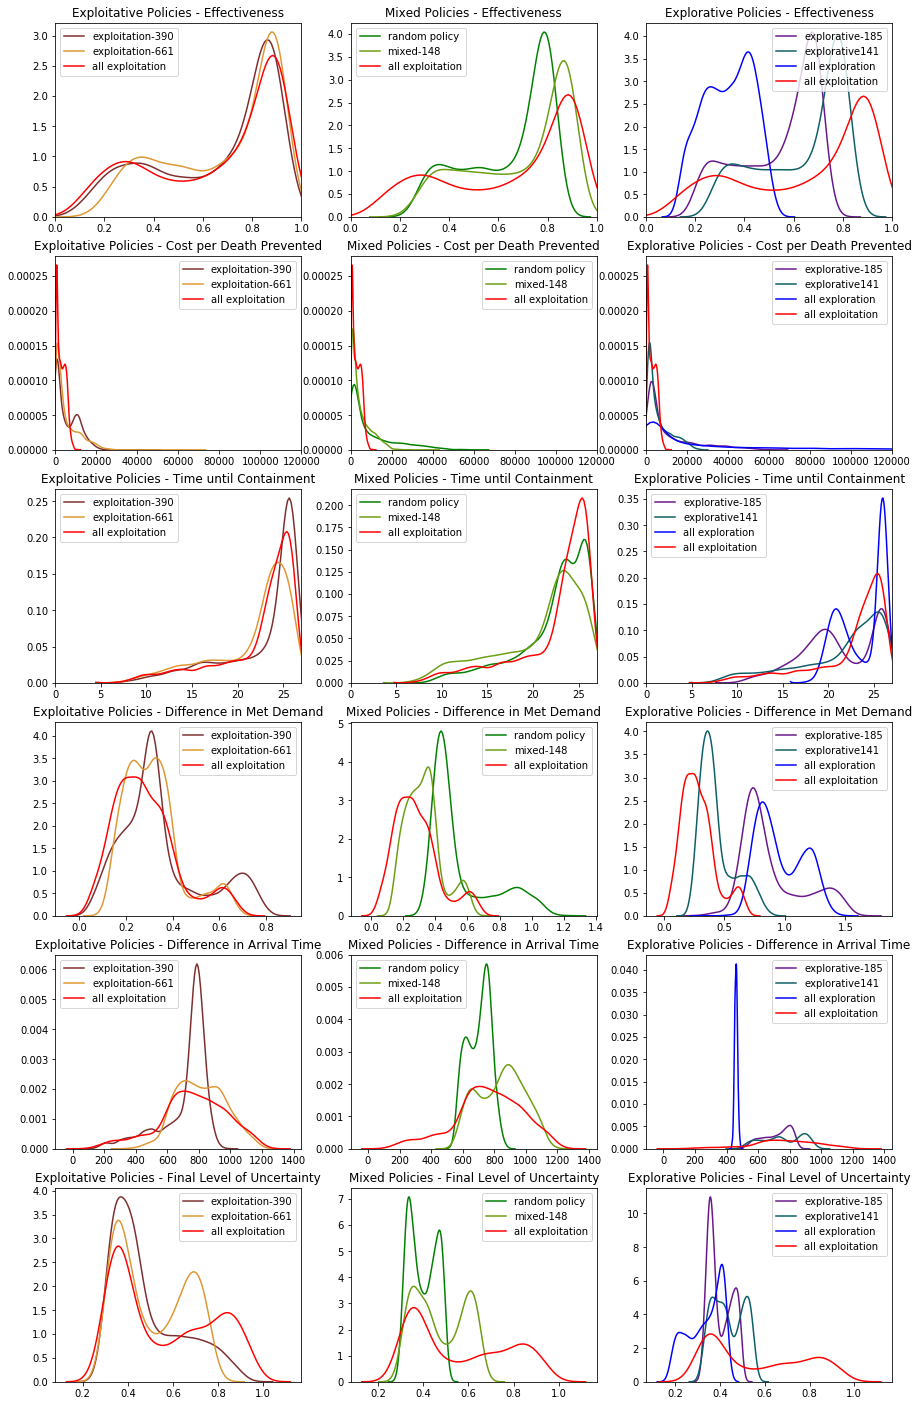

In [12]:
plt.figure(figsize=(15,25))


# EFFECTIVENESS
plt.subplot2grid((6,3),(0,0))

sns.kdeplot(exploitation_390['mean effectiveness'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['mean effectiveness'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['mean effectiveness'], label="all exploitation", color='r')
plt.xlim([0,1])
plt.title('Exploitative Policies - Effectiveness')

plt.subplot2grid((6,3),(0,1))

sns.kdeplot(mixed_random['mean effectiveness'], label="random policy", color='g')
sns.kdeplot(mixed_148['mean effectiveness'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['mean effectiveness'], label="all exploitation", color='r')
plt.xlim([0,1])
plt.title('Mixed Policies - Effectiveness')

plt.subplot2grid((6,3),(0,2))

sns.kdeplot(exploration_185['mean effectiveness'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['mean effectiveness'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['mean effectiveness'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['mean effectiveness'], label="all exploitation", color='r')
plt.xlim([0,1])
plt.title('Explorative Policies - Effectiveness')


# COST PER DEATH PREVENTED

plt.subplot2grid((6,3),(1,0))

sns.kdeplot(exploitation_390['mean cost per death prevented'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['mean cost per death prevented'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['mean cost per death prevented'], label="all exploitation", color='r')
plt.xlim(0,120000)
plt.title('Exploitative Policies - Cost per Death Prevented')

plt.subplot2grid((6,3),(1,1))

sns.kdeplot(mixed_random['mean cost per death prevented'], label="random policy", color='g')
sns.kdeplot(mixed_148['mean cost per death prevented'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['mean cost per death prevented'], label="all exploitation", color='r')
plt.xlim(0,120000)
plt.title('Mixed Policies - Cost per Death Prevented')

plt.subplot2grid((6,3),(1,2))

sns.kdeplot(exploration_185['mean cost per death prevented'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['mean cost per death prevented'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['mean cost per death prevented'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['mean cost per death prevented'], label="all exploitation", color='r')
plt.xlim(0,120000)
plt.title('Explorative Policies - Cost per Death Prevented')


# TIME UNTIL CONTAINMENT
plt.subplot2grid((6,3),(2,0))

sns.kdeplot(exploitation_390['mean time until containment'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['mean time until containment'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['mean time until containment'], label="all exploitation", color='r')
plt.xlim([0,27])
plt.title('Exploitative Policies - Time until Containment')

plt.subplot2grid((6,3),(2,1))

sns.kdeplot(mixed_random['mean time until containment'], label="random policy", color='g')
sns.kdeplot(mixed_148['mean time until containment'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['mean time until containment'], label="all exploitation", color='r')
plt.xlim([0,27])
plt.title('Mixed Policies - Time until Containment')

plt.subplot2grid((6,3),(2,2))

sns.kdeplot(exploration_185['mean time until containment'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['mean time until containment'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['mean time until containment'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['mean time until containment'], label="all exploitation", color='r')
plt.xlim([0,27])
plt.title('Explorative Policies - Time until Containment')


# DIFFERENCE IN MET DEMAND

plt.subplot2grid((6,3),(3,0))

sns.kdeplot(exploitation_390['mean difference in met demand'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['mean difference in met demand'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['mean difference in met demand'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Exploitative Policies - Difference in Met Demand')

plt.subplot2grid((6,3),(3,1))

sns.kdeplot(mixed_random['mean difference in met demand'], label="random policy", color='g')
sns.kdeplot(mixed_148['mean difference in met demand'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['mean difference in met demand'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Mixed Policies - Difference in Met Demand')

plt.subplot2grid((6,3),(3,2))

sns.kdeplot(exploration_185['mean difference in met demand'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['mean difference in met demand'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['mean difference in met demand'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['mean difference in met demand'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Explorative Policies - Difference in Met Demand')


# DIFFERENCE IN ARRIVAL TIME

plt.subplot2grid((6,3),(4,0))

sns.kdeplot(exploitation_390['mean difference in arrival time'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['mean difference in arrival time'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['mean difference in arrival time'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Exploitative Policies - Difference in Arrival Time')

plt.subplot2grid((6,3),(4,1))

sns.kdeplot(mixed_random['mean difference in arrival time'], label="random policy", color='g')
sns.kdeplot(mixed_148['mean difference in arrival time'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['mean difference in arrival time'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Mixed Policies - Difference in Arrival Time')

plt.subplot2grid((6,3),(4,2))

sns.kdeplot(exploration_185['mean difference in arrival time'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['mean difference in arrival time'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['mean difference in arrival time'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['mean difference in arrival time'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Explorative Policies - Difference in Arrival Time')


# FINAL UNCERTAINTY LEVEL

plt.subplot2grid((6,3),(5,0))

sns.kdeplot(exploitation_390['final uncertainty'], label="exploitation-390" , color='#7e2e2e')
sns.kdeplot(exploitation_661['final uncertainty'], label="exploitation-661", color='#DE9733')
sns.kdeplot(exploitation_100['final uncertainty'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Exploitative Policies - Final Level of Uncertainty')

plt.subplot2grid((6,3),(5,1))

sns.kdeplot(mixed_random['final uncertainty'], label="random policy", color='g')
sns.kdeplot(mixed_148['final uncertainty'], label="mixed-148", color='#6C9E12')
sns.kdeplot(exploitation_100['final uncertainty'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Mixed Policies - Final Level of Uncertainty')

plt.subplot2grid((6,3),(5,2))

sns.kdeplot(exploration_185['final uncertainty'], label="explorative-185", color='#69178C')
sns.kdeplot(exploration_141['final uncertainty'], label="explorative141", color='#0D5F67')
sns.kdeplot(exploration_100['final uncertainty'], label="all exploration", color='b')
sns.kdeplot(exploitation_100['final uncertainty'], label="all exploitation", color='r')
#plt.xlim([0,1])
plt.title('Explorative Policies - Final Level of Uncertainty')


### Robustness Measures ###
First, defining the functions for the two robustness measures.

In [2]:
def starr_domain(outcome_list, criterion):
    total_scenarios = len(outcome_list)
    met_scenarios = 0
    for outcome in outcome_list:
        #outcomes are minimized - less is more :)
        if outcome < criterion:
            met_scenarios += 1
            
    return met_scenarios/total_scenarios

import statistics

def undesirable_dev(outcome_list):
    outcome_list.sort()
    median = statistics.median(outcome_list)

    
    undesirable_sum = 0
    
    #all the outcomes are minimized (incl. effectiveness if you leave it in it's original negative state)
    #so the worst outcomes are in the second half of the list
    for i in range(int(len(outcome_list)/2),len(outcome_list)):
        undesirable_sum += outcome_list[i] - median
        
    return undesirable_sum

Reloading the data - we don't want to flip the sign for the effectiveness score this time, and we have no need for the final uncertainty outcome

In [3]:
experiments1, outcomes1 = constant_policies

policies = experiments1['policy']


#create a dataframe with all the scalar outcomes 
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']

data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies

#select a dataframe for each policy
exploration_100 = data[data['policy'] == 'All exploration']
mixed_random = data[data['policy'] == '50-50']
exploitation_100 = data[data['policy'] == 'All exploitation']



In [4]:
experiments2, outcomes2 = policies_functions

policies = experiments2['policy']


#create a dataframe with all the scalar outcomes 
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']

data = pd.DataFrame.from_dict(dict((k, outcomes2[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies

#select a dataframe for each policy
exploration_141 = data[data['policy'] == 141]
exploration_185 = data[data['policy'] == 185]
mixed_148 = data[data['policy'] == 148]
exploitation_390 = data[data['policy'] == 390]
exploitation_661 = data[data['policy'] == 661]

Calculating the values for ***Undesirable Deviations***

In [10]:
und_dev_141 = ['explorative-141']

for col in exploration_141:
    if col != 'policy':
        dev = undesirable_dev(exploration_141[col].to_list())
        und_dev_141.append(dev)
        
        
und_dev_185 = ['explorative-185']

for col in exploration_185:
    if col != 'policy':
        dev = undesirable_dev(exploration_185[col].to_list())
        und_dev_185.append(dev)
        
und_dev_148 = ['mixed-148']

for col in mixed_148:
    if col != 'policy':
        dev = undesirable_dev(mixed_148[col].to_list())
        und_dev_148.append(dev)

und_dev_390 = ['exploitative-390']

for col in exploitation_390:
    if col != 'policy':
        dev = undesirable_dev(exploitation_390[col].to_list())
        und_dev_390.append(dev)
        

        
und_dev_661 = ['exploitative-661']

for col in exploitation_661:
    if col != 'policy':
        dev = undesirable_dev(exploitation_661[col].to_list())
        und_dev_661.append(dev)
        
und_dev_exploit = ['all exploitation']

for col in exploitation_100:
    if col != 'policy':
        dev = undesirable_dev(exploitation_100[col].to_list())
        und_dev_exploit.append(dev)

und_dev_scores = pd.DataFrame(np.array([und_dev_141,  und_dev_185, und_dev_148, und_dev_390, und_dev_661, und_dev_exploit]),
                    columns=['Policy','Robustness in Effectiveness', 'Robustness in Cost per death prevented',
                             'Robustness in Difference in Demand Met', 'Robustness in Difference in Arrival Time',
                            'Robustness in Time until containment'])

und_dev_scores

,Policy,Robustness in Effectiveness,Robustness in Cost per death prevented,Robustness in Difference in Demand Met,Robustness in Difference in Arrival Time,Robustness in Time until containment
0,explorative-141,278.7280527215389,2425.320000000003,192.21105583732512,146101.5275000001,8314308.294871679
1,explorative-185,241.4209914307481,4971.720000000018,365.48283765268275,71184.06250000004,18161654.42431921
2,mixed-148,317.9120562147807,2312.520000000013,119.69123063528974,135077.72375000012,422188995.7435032
3,exploitative-390,398.51825782418535,799.6800000000032,209.32494911293864,54130.810000000056,2199204969.520263
4,exploitative-661,358.3966906450121,1775.8799999999903,135.61311459372317,170452.55000000008,4041461550.3935246
5,all exploitation,415.03189977984533,1572.1200000000215,161.77713011951087,207932.40625000012,2726191.997642819


These values are pretty wild and hard to compare - so let's normalize them. This is fine because it's a relative robustness measure.

In [11]:
from sklearn import preprocessing

df = und_dev_scores[['Robustness in Effectiveness', 'Robustness in Cost per death prevented',
                    'Robustness in Difference in Demand Met', 'Robustness in Difference in Arrival Time',
                    'Robustness in Time until containment']]



# Create x, where x the 'scores' column's values as floats
x = df.values

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)



und_dev_scores['Robustness in Effectiveness'] = df_normalized[0]
und_dev_scores['Robustness in Cost per death prevented'] = df_normalized[1]
und_dev_scores['Robustness in Difference in Demand Met'] = df_normalized[2]
und_dev_scores['Robustness in Difference in Arrival Time'] = df_normalized[3]
und_dev_scores['Robustness in Time until containment'] = df_normalized[4]

und_dev_scores

C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Policy,Robustness in Effectiveness,Robustness in Cost per death prevented,Robustness in Difference in Demand Met,Robustness in Difference in Arrival Time,Robustness in Time until containment
0,explorative-141,0.214889,0.389651,0.295046,0.597983,0.001384
1,explorative-185,0.000000,1.000000,1.000000,0.110878,0.003822
2,mixed-148,0.440589,0.362614,0.000000,0.526307,0.103860
3,exploitative-390,0.904881,0.000000,0.364674,0.000000,0.543853
4,exploitative-661,0.673781,0.233986,0.064778,0.756310,1.000000
5,all exploitation,1.000000,0.185147,0.171226,1.000000,0.000000


In [26]:
und_dev_scores['policy_number'] = [0,0.6,0.2,0.4,0.8,1]

und_dev_scores

,Policy,Robustness in Effectiveness,Robustness in Cost per death prevented,Robustness in Difference in Demand Met,Robustness in Difference in Arrival Time,Robustness in Time until containment,policy_number
0,explorative-141,0.214889,0.389651,0.295046,0.597983,0.001384,0.0
1,explorative-185,0.000000,1.000000,1.000000,0.110878,0.003822,0.6
2,mixed-148,0.440589,0.362614,0.000000,0.526307,0.103860,0.2
3,exploitative-390,0.904881,0.000000,0.364674,0.000000,0.543853,0.4
4,exploitative-661,0.673781,0.233986,0.064778,0.756310,1.000000,0.8
5,all exploitation,1.000000,0.185147,0.171226,1.000000,0.000000,1.0


In [27]:
import plotly
import plotly.graph_objs as go

import pandas as pd 

plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Parcoords(
        line = dict(color = und_dev_scores['policy_number'],
                   colorscale = [[0, '#0D5F67'], 
                                [0.2, '#6C9E12'], 
                                [0.4,'#7e2e2e'], 
                                [0.6, '#69178C'], 
                                [0.8, '#DE9733'],
                                [1,'#ff0000']]),  #
        dimensions = list([
            dict(range = [0,1],
                label = 'Effectiveness', values = und_dev_scores['Robustness in Effectiveness']),
            dict(range = [0,1],
                label = 'Cost', values = und_dev_scores['Robustness in Cost per death prevented']),
            dict(range = [0,1],
                label = 'Met Demand', values = und_dev_scores['Robustness in Difference in Demand Met']),
            dict(range = [0,1],
                label = 'Arrival Time', values = und_dev_scores['Robustness in Difference in Arrival Time']),
            dict(range = [0,1],
                label = 'Time until Containment', values = und_dev_scores['Robustness in Time until containment'])
        ])
    )
]



fig = go.Figure(data = data)
plotly.offline.iplot(fig, filename = 'parcoords-basic')

***Starr's Domain Criterion***

In [19]:
st_dom_141 = ['explorative-141']

for col in exploration_141:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(exploration_141[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(exploration_141[col].to_list(), exploitation_100[col].median())
        st_dom_141.append(st)
        
st_dom_148 = ['mixed-148']

for col in mixed_148:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(mixed_148[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(mixed_148[col].to_list(), exploitation_100[col].median())
        st_dom_148.append(st)
        
st_dom_390 = ['exploitative-390']

for col in exploitation_390:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(exploitation_390[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(exploitation_390[col].to_list(), exploitation_100[col].median())
        st_dom_390.append(st)
        
st_dom_185 = ['explorative-185']

for col in exploration_185:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(exploration_185[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(exploration_185[col].to_list(), exploitation_100[col].median())
        st_dom_185.append(st)
        
st_dom_661 = ['exploitative-661']

for col in exploitation_661:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(exploitation_661[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(exploitation_661[col].to_list(), exploitation_100[col].median())
        st_dom_661.append(st)
        
st_dom_exploit = ['all exploitation']

for col in exploitation_100:
    if col != 'policy':
        if col == 'Time until containment':
            st = starr_domain(exploitation_100[col].to_list(), exploitation_100[col].median())
        else:
            st = starr_domain(exploitation_100[col].to_list(), exploitation_100[col].median())
        
        st_dom_exploit.append(st)
        
st_dom_scores = pd.DataFrame(np.array([st_dom_141, st_dom_185, st_dom_148, st_dom_390,  st_dom_661, st_dom_exploit]),
                    columns=['Policy','Robustness in Effectiveness', 'Robustness in Cost per death prevented',
                             'Robustness in Difference in Demand Met', 'Robustness in Difference in Arrival Time',
                            'Robustness in Time until containment'])

st_dom_scores

,Policy,Robustness in Effectiveness,Robustness in Cost per death prevented,Robustness in Difference in Demand Met,Robustness in Difference in Arrival Time,Robustness in Time until containment
0,explorative-141,0.3436,0.6132,0.0404,0.5384,0.4352
1,explorative-185,0.0004,0.6472,0.0,0.5992,0.2764
2,mixed-148,0.5048,0.7284,0.3048,0.3196,0.4784
3,exploitative-390,0.4948,0.3904,0.3304,0.4616,0.436
4,exploitative-661,0.5016,0.6176,0.4,0.4144,0.4808
5,all exploitation,0.5,0.4964,0.5,0.5,0.5


In [20]:
st_dom_scores['policy_number'] = [0,0.6,0.2,0.4,0.8,1]

In [28]:
import pandas as pd 

plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Parcoords(
        line = dict(color = st_dom_scores['policy_number'],
                   colorscale = [[0, '#0D5F67'], 
                                [0.2, '#6C9E12'], 
                                [0.4,'#7e2e2e'], 
                                [0.6, '#69178C'], 
                                [0.8, '#DE9733'],
                                [1,'#ff0000']]),  
        dimensions = list([
            dict(range = [0,1],
                label = 'Effectiveness', values = st_dom_scores['Robustness in Effectiveness']),
            dict(range = [0,1],
                label = 'Cost', values = st_dom_scores['Robustness in Cost per death prevented']),
            dict(range = [0,1],
                label = 'Met Demand', values = st_dom_scores['Robustness in Difference in Demand Met']),
            dict(range = [0,1],
                label = 'Arrival Time', values = st_dom_scores['Robustness in Difference in Arrival Time']),
            dict(range = [0,1],
                label = 'Time until Containment', values = st_dom_scores['Robustness in Time until containment'])
         
        ])
    )]



fig = go.Figure(data = data)
plotly.offline.iplot(fig, filename = 'parcoords-basic')